# Image processing reverse engineering with NN
### www.elmomentodecisivo.com

## Libraries needed

In [1]:
import os
import imageio  # read/write image formats

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor  # our MLP!

## Read images (training set)

In [2]:
# Alternative to imageio:
# import Image
# img = Image.open(infilename)

features = imageio.imread('./RGB16Million.png')
targets = imageio.imread('./RGB16Milliontransformed.png')

HEIGHT = features.shape[0]
WIDTH = features.shape[1]

print("Images have HEIGHT =", HEIGHT, "and WIDTH =", WIDTH)
print("Total number of training examples is", HEIGHT*WIDTH)

Images have HEIGHT = 4096 and WIDTH = 4096
Total number of training examples is 16777216


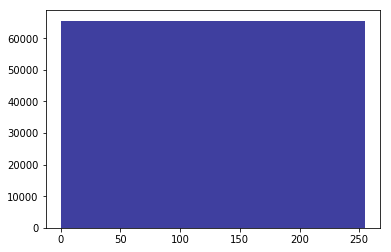

In [3]:
# Features histogram (flat since it contains once every possible value)
R = features[:, :, 0].flatten()
G = features[:, :, 1].flatten()
B = features[:, :, 2].flatten()

plt.hist(R, bins=256, color='r', alpha=0.5)
plt.hist(G, bins=256, color='g', alpha=0.5)
plt.hist(B, bins=256, color='b', alpha=0.5)
plt.show();

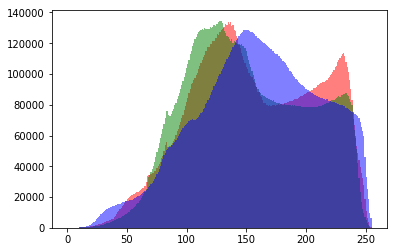

In [4]:
# Targets histogram
R_ = targets[:, :, 0].flatten()
G_ = targets[:, :, 1].flatten()
B_ = targets[:, :, 2].flatten()

plt.hist(R_, bins=256, color='r', alpha=0.5)
plt.hist(G_, bins=256, color='g', alpha=0.5)
plt.hist(B_, bins=256, color='b', alpha=0.5)
plt.show();

## Neural Network training

In [5]:
# Convert images into long 2D arrays
X = np.column_stack((R, G, B))/255
Y = np.column_stack((R_, G_, B_))/255

In [6]:
# Save memory
del features, targets, R, G, B, R_, G_, B_
%whos

Variable       Type       Data/Info
-----------------------------------
HEIGHT         int        4096
MLPRegressor   ABCMeta    <class 'sklearn.neural_ne<...>perceptron.MLPRegressor'>
WIDTH          int        4096
X              ndarray    16777216x3: 50331648 elems, type `float64`, 402653184 bytes (384.0 Mb)
Y              ndarray    16777216x3: 50331648 elems, type `float64`, 402653184 bytes (384.0 Mb)
imageio        module     <module 'imageio' from 'C<...>s\\imageio\\__init__.py'>
np             module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
os             module     <module 'os' from 'C:\\Us<...>vs\\py36env\\lib\\os.py'>
plt            module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


In [7]:
# NN training hyperparameters
regr = MLPRegressor(solver='adam',  # solver 'sgd', lbfgs'
                    alpha=0,  # no L2 (ridge regression) regularization
                    hidden_layer_sizes=(64, 64),  # tuple setting layers and nodes
                    activation='logistic',  # hidden layer activation function (default 'relu') 
                                            # 'logistic' (sigmoid) seems more adequate to model continuous functions
                    max_iter=30,  # max epochs
                    tol=0.0000001,  # tolerance for early stopping
                    n_iter_no_change=10,  # number of epochs to check tol
                    verbose=True)  # tell me a story
regr.out_activation_ = 'relu'  # output layer activation function (default 'identity')
                               # 'relu' seems a good idea since RGB values can only be positive
regr.fit(X, Y)

Iteration 1, loss = 0.00045729
Iteration 2, loss = 0.00003925
Iteration 3, loss = 0.00002442
Iteration 4, loss = 0.00001824
Iteration 5, loss = 0.00001517
Iteration 6, loss = 0.00001330
Iteration 7, loss = 0.00001196
Iteration 8, loss = 0.00001094
Iteration 9, loss = 0.00001014
Iteration 10, loss = 0.00000949
Iteration 11, loss = 0.00000892
Iteration 12, loss = 0.00000841
Iteration 13, loss = 0.00000796
Iteration 14, loss = 0.00000756
Iteration 15, loss = 0.00000720
Iteration 16, loss = 0.00000690
Iteration 17, loss = 0.00000661
Iteration 18, loss = 0.00000634
Iteration 19, loss = 0.00000606
Iteration 20, loss = 0.00000582
Iteration 21, loss = 0.00000560
Iteration 22, loss = 0.00000540
Iteration 23, loss = 0.00000521
Iteration 24, loss = 0.00000503
Iteration 25, loss = 0.00000488
Iteration 26, loss = 0.00000474
Iteration 27, loss = 0.00000462
Iteration 28, loss = 0.00000450
Iteration 29, loss = 0.00000440
Iteration 30, loss = 0.00000430


C:\Users\gluij\Anaconda3\envs\py36env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=30, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=1e-07,
       validation_fraction=0.1, verbose=True, warm_start=False)

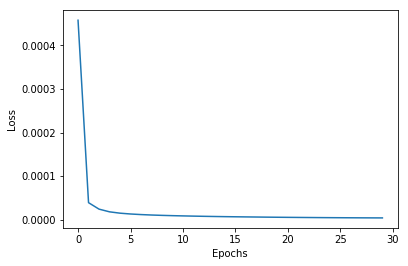

In [8]:
plt.plot(regr.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Epochs');

In [11]:
# NN weights
regr.coefs_

[array([[-1.34589543e+01, -1.19245023e+00,  7.57777495e+00,
         -4.97814923e+00, -1.11405655e+00, -6.51102169e+00,
         -2.99981788e+00,  4.89162644e+00, -4.97821511e+00,
         -2.99259952e+00, -1.68947656e+00,  3.35176266e+00,
         -2.83585754e+00, -4.70531138e-01,  3.74226156e+00,
         -1.82360805e+00, -6.20344281e-01, -5.24387240e+00,
         -4.06373610e+00,  1.33416096e-01,  9.81402872e+00,
         -2.04600893e+00,  1.09891260e+00, -1.39990293e+00,
         -2.30087772e+00,  3.99473126e-01,  4.04009150e-01,
          2.66056622e-01, -3.13850626e+00,  1.74818954e+00,
          1.60344162e+00,  4.07180140e+00, -1.71668164e+00,
          3.27438424e-01, -2.34651383e+00, -7.42672092e+00,
         -8.65042864e+00, -2.12268488e+01, -2.53750345e+00,
          1.42693827e+00, -1.28517000e+00, -1.00708795e+00,
         -2.02079223e-01,  1.70436718e+01,  8.69650668e-02,
         -9.51758694e+00, -2.75235232e+00,  4.20805025e-01,
         -2.14319052e-02,  3.21027445e+0

In [12]:
# NN biases
regr.intercepts_

[array([ 1.08060003e+00,  3.62940554e-02, -1.19631122e+00,  7.48017044e-01,
         4.06062361e+00, -6.74510122e-02,  1.07003075e+00,  3.54057388e+00,
        -3.56464591e+00, -3.92587916e-01,  7.09701972e+00,  4.24423301e-01,
         1.26421783e+00, -6.07945639e-01, -2.88570260e+00, -2.73986836e-01,
         7.19079568e-02, -1.22730861e+00, -6.35639272e-01,  4.90070846e-01,
         1.98763831e+00, -4.01325007e-01, -2.90203661e+00, -3.11709760e-01,
         4.22372829e-01, -1.54089577e+00,  3.22513725e-01, -3.12437658e+00,
         5.36791413e-01, -6.16895675e-01, -3.13223999e+00,  1.51331586e+00,
        -4.85894331e+00, -1.28984768e+00, -1.81073374e+00,  4.53678321e+00,
         7.72623947e-01, -1.59791457e-01, -2.54011654e+00, -2.41884612e+00,
        -2.86037797e+00,  2.43341793e-01, -5.12220013e-01, -1.98867281e+00,
        -1.60365621e+00,  3.25598137e+00, -3.26522280e+00, -4.53306561e+00,
        -2.91533872e+00, -3.90916745e+00,  1.04696331e-01,  5.05018315e+00,
        -5.3

## Neural Network prediction

In [13]:
# Read image to process (unknown to the NN)
to_predict = imageio.imread('./wendolin.png')
# to_predict = imageio.imread('./aspirations.png')

HEIGHT = to_predict.shape[0]
WIDTH = to_predict.shape[1]

# Extract RGB channels
R = to_predict[:, :, 0].flatten()
G = to_predict[:, :, 1].flatten()
B = to_predict[:, :, 2].flatten()

X = np.column_stack((R, G, B))/255

In [21]:
# Prediction
Y_pred = regr.predict(X)

# Keep in range [0..1]
Y_pred[Y_pred < 0] = 0.0
Y_pred[Y_pred > 1] = 1.0

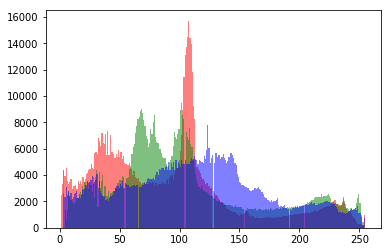

In [22]:
# Prediction histogram
R_ = np.round(Y_pred[:, 0]*255).astype(int)
G_ = np.round(Y_pred[:, 1]*255).astype(int)
B_ = np.round(Y_pred[:, 2]*255).astype(int)

plt.hist(R_, bins=256, color='r', alpha=0.5)
plt.hist(G_, bins=256, color='g', alpha=0.5)
plt.hist(B_, bins=256, color='b', alpha=0.5)
plt.show();

In [42]:
# Build prediction image
R_pred = Y_pred[:, 0].reshape(HEIGHT, WIDTH)
G_pred = Y_pred[:, 1].reshape(HEIGHT, WIDTH)
B_pred = Y_pred[:, 2].reshape(HEIGHT, WIDTH)

prediction = np.zeros((HEIGHT, WIDTH, 3), dtype=np.float64)
prediction[:, :, 0] = R_pred
prediction[:, :, 1] = G_pred
prediction[:, :, 2] = B_pred

prediction = np.round(prediction * 255).astype('uint8')  # range [0..255]

print("Min / Max predicted values:", np.min(prediction), "/", np.max(prediction))

Min/Max predicted values: 1 / 255


In [24]:
# Save output image    
imageio.imwrite('prediction_wendolin_64_64.png', prediction)